# **Student Grade Predictor with Linear Regression**
 **Goal:** Use a linear regression model to predict final grades based on academic and
 behavioral features.

**Install Required Libraries**

In [1]:
!pip install ucimlrepo

**Load or Simulate Dataset**

In [20]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

In [21]:
import pandas as pd
import numpy as np

df = pd.concat([X, y], axis=1)

# Show the first 5 rows
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


**Visualize Relationships**

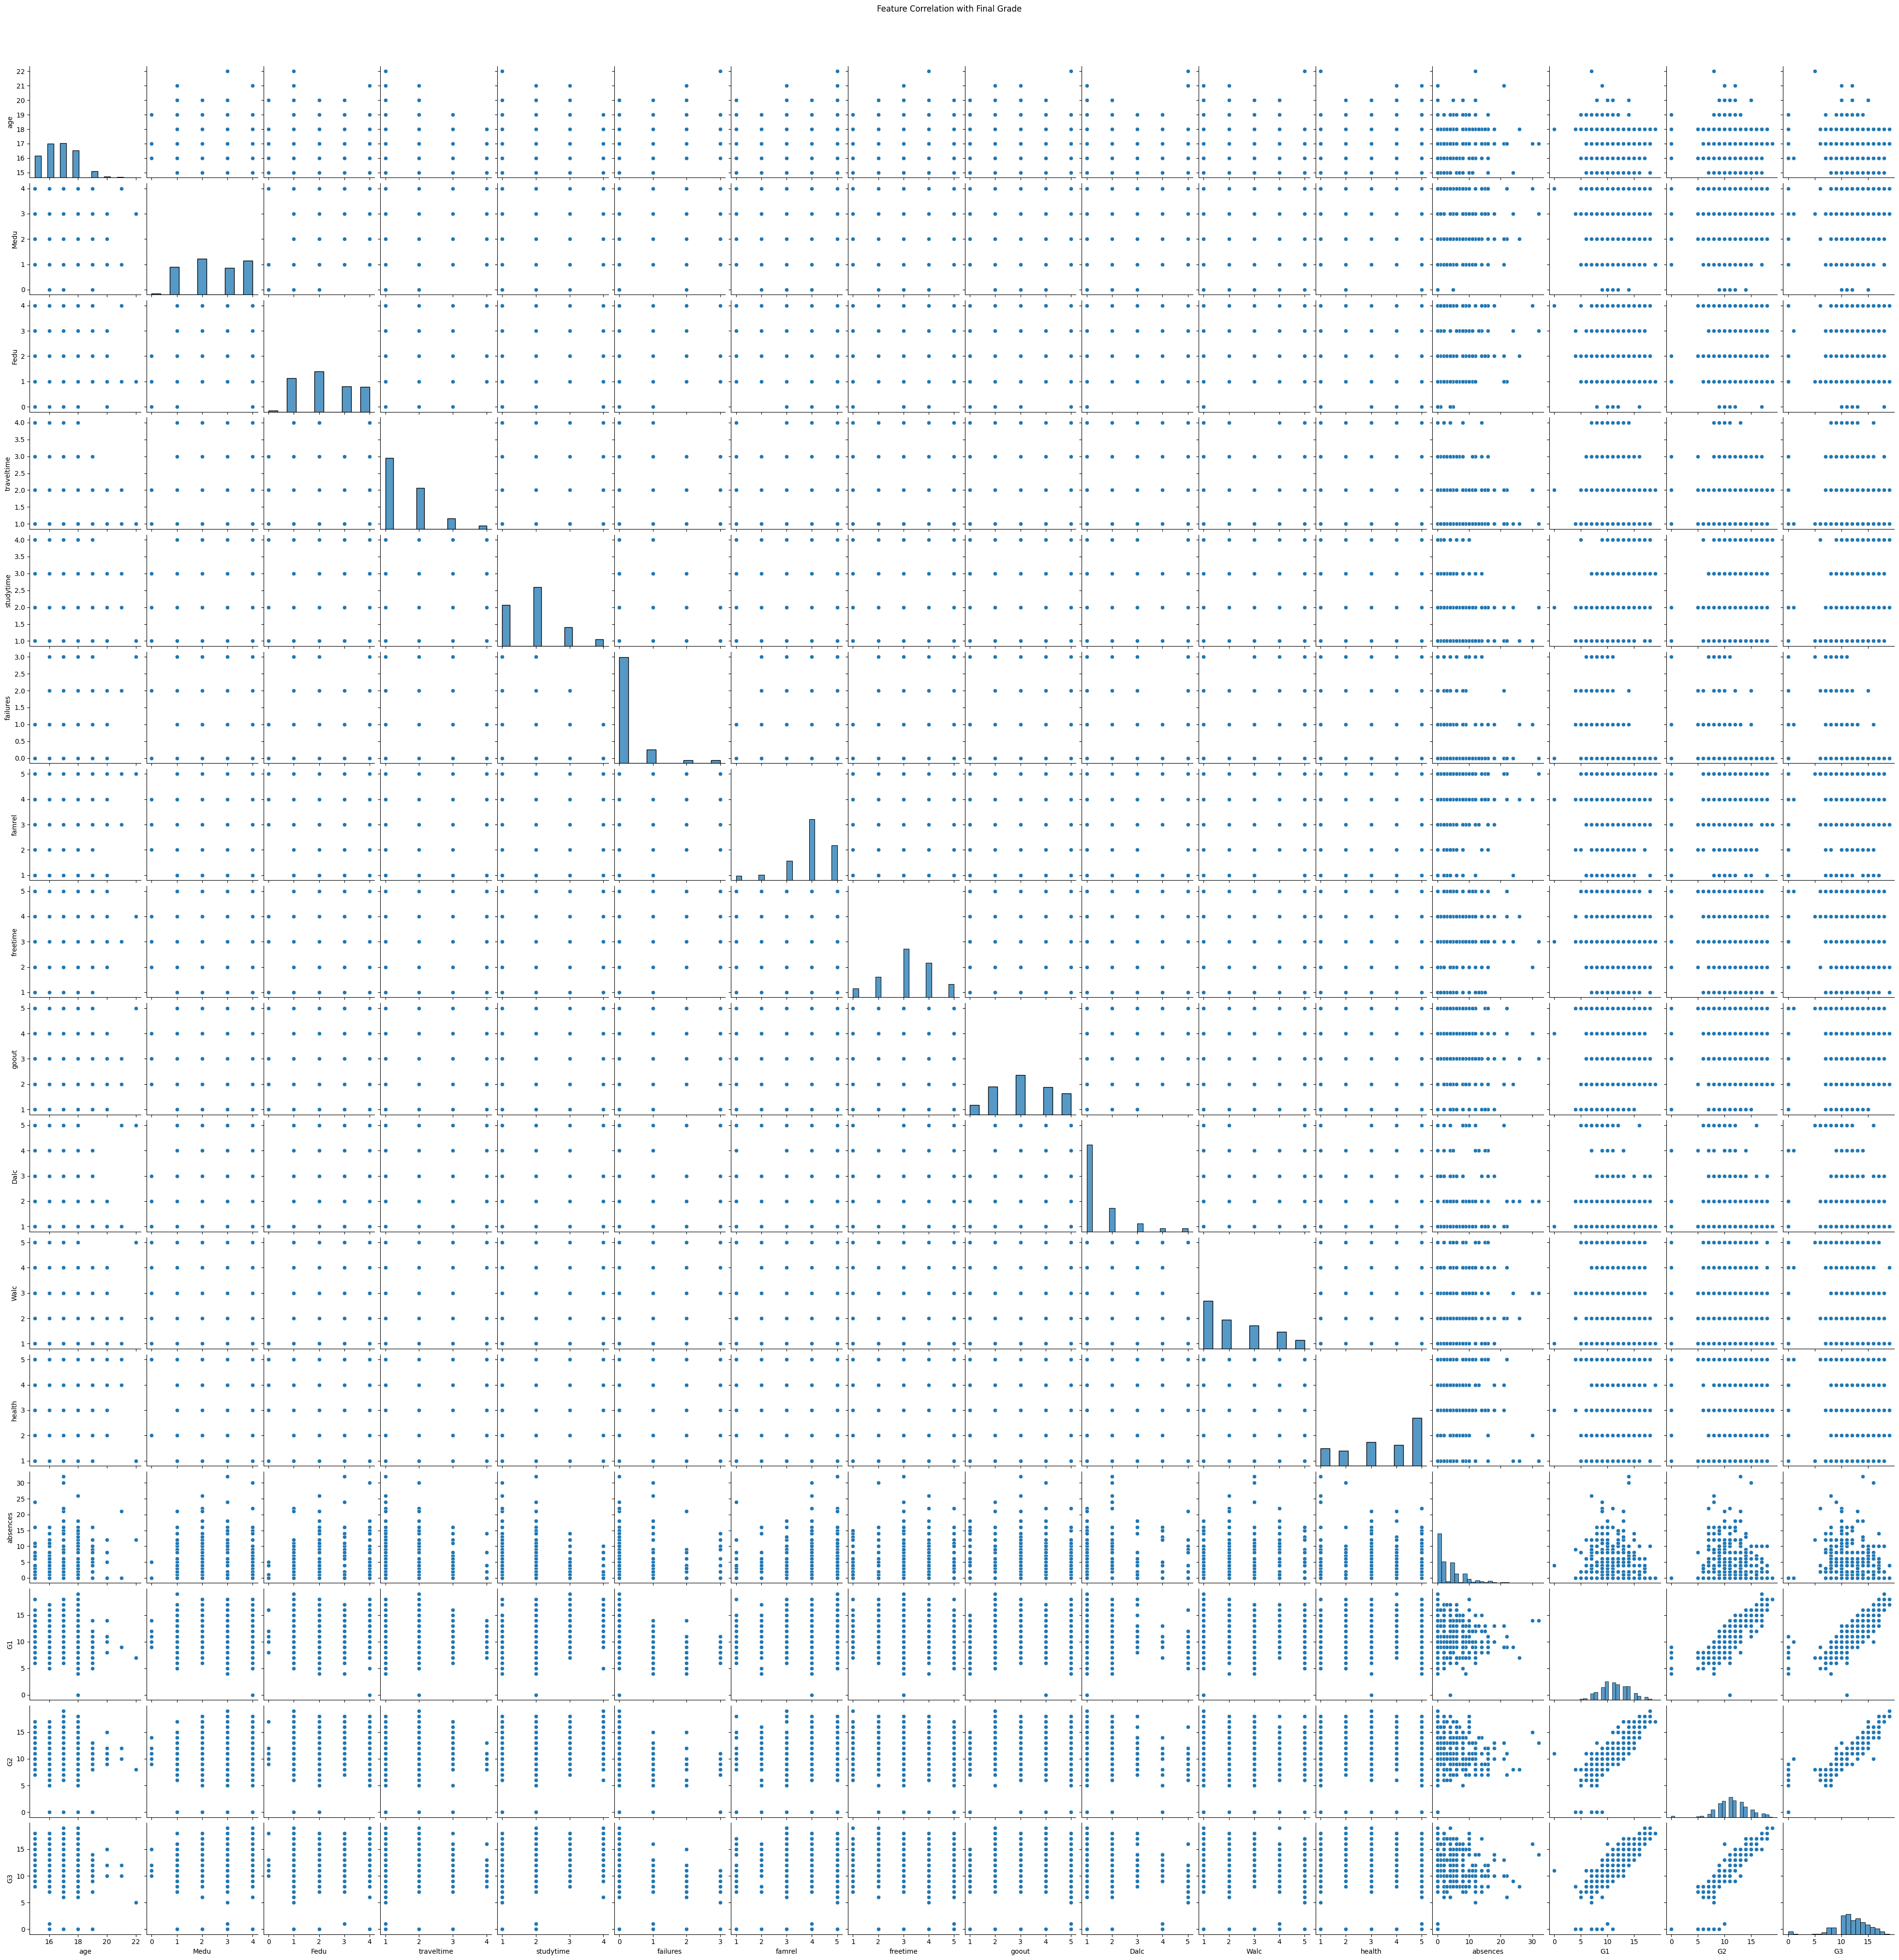

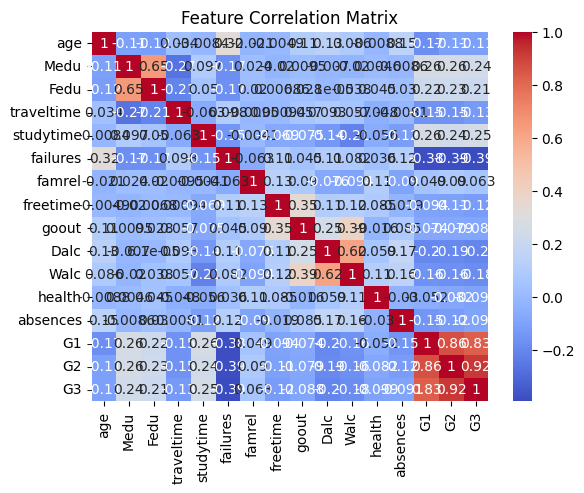

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
# Pairplot
sns.pairplot(df)
plt.suptitle("Feature Correlation with Final Grade", y=1.02)
plt.show()

# Only use numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include='number')

# Correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


**Train the Linear Regression Model**

In [24]:
from sklearn.model_selection import train_test_split

X = df[['studytime', 'absences', 'G2']]  # or use 'G1' instead of 'G2'
y = df['G3']


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42
)


**Predict and Evaluate**

In [26]:
from sklearn.linear_model import LinearRegression
# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)
# Coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model Coefficients: [0.1487377  0.02008502 1.02545036]
Intercept: -0.3133724279782495


**Predict and Evaluate**

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
# Predict on test data
y_pred = model.predict(X_test)
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 1.28
R² Score: 0.87


**Visualize Actual vs Predicted**

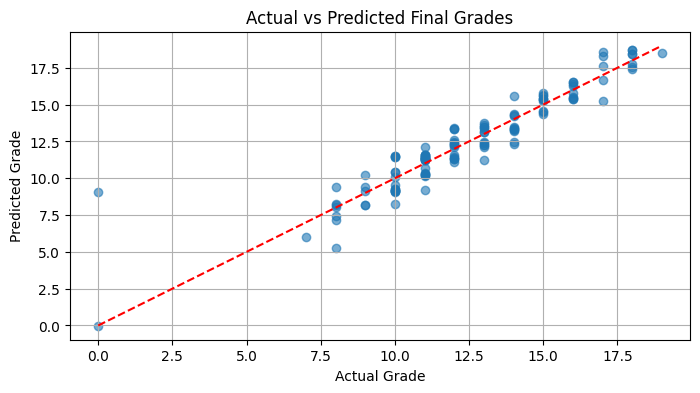

In [28]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual grades
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title("Actual vs Predicted Final Grades")
plt.xlabel("Actual Grade")
plt.ylabel("Predicted Grade")
plt.grid(True)
plt.show()


## **📌 Project Summary: Predicting Student Final Grades**
In this project, we analyzed the Student Performance Dataset from the UCI Machine Learning Repository to predict students' final math grades (G3) using features such as:
*   Study time (studytime)
*   School absences (absences)
*   Second period grade (G2)

We used a linear regression model for this task. After splitting the data into training and test sets, the model was trained and evaluated **using:**

*   R² Score: 0.87 — indicating the model explains 87% of the variance in finalgrades
*   Mean Squared Error (MSE): 1.28 — with an average prediction error of about 1.13 grade points

A scatter plot of predicted vs actual grades showed a strong correlation, confirming the model's effectiveness.

This project demonstrates how prior academic performance and study habits can be strong indicators of a student’s final results.